In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
climate_data = pd.read_excel('https://www.chmi.cz/files/portal/docs/meteo/ok/files/PKLM_pro_portal.xlsx',
                    sheet_name='data',engine='openpyxl')
climate_data

,rok,měsíc,den,T-AVG,TMA,TMI,SRA,Flag
0,1775,1,1,-7.0,-4.8,-10.1,NaN,NaN
1,1775,1,2,-2.2,-1.4,-5.8,NaN,NaN
2,1775,1,3,-1.0,0.6,-2.2,NaN,NaN
3,1775,1,4,0.1,2.5,-3.6,NaN,NaN
4,1775,1,5,2.2,3.0,1.6,NaN,NaN
...,...,...,...,...,...,...,...,...
90210,2021,12,27,0.3,1.5,-2.1,0.0,T
90211,2021,12,28,2.3,3.4,0.1,2.5,NaN
90212,2021,12,29,5.8,7.9,2.1,0.4,NaN
90213,2021,12,30,11.7,12.9,6.6,0.3,NaN


In [80]:
climate_data.to_csv('./data/climate_data.csv')

In [81]:
data = pd.read_csv('./data/climate_data.csv')

#### Replace column names to english

In [82]:
data.rename(columns={'rok':'year','měsíc':'month', 'den':'day'},inplace=True)


#### Create a new column called date, use year, month, day columns to create this column

In [83]:
data['date'] = pd.to_datetime(data[['year','month','day']])

In [84]:
data.head()

,Unnamed: 0,year,month,day,T-AVG,TMA,TMI,SRA,Flag,date
0,0,1775,1,1,-7.0,-4.8,-10.1,NaN,NaN,1775-01-01
1,1,1775,1,2,-2.2,-1.4,-5.8,NaN,NaN,1775-01-02
2,2,1775,1,3,-1.0,0.6,-2.2,NaN,NaN,1775-01-03
3,3,1775,1,4,0.1,2.5,-3.6,NaN,NaN,1775-01-04
4,4,1775,1,5,2.2,3.0,1.6,NaN,NaN,1775-01-05


In [85]:
data = data.drop('Unnamed: 0', axis=1)

#### Plot average temperature for the last 3 years

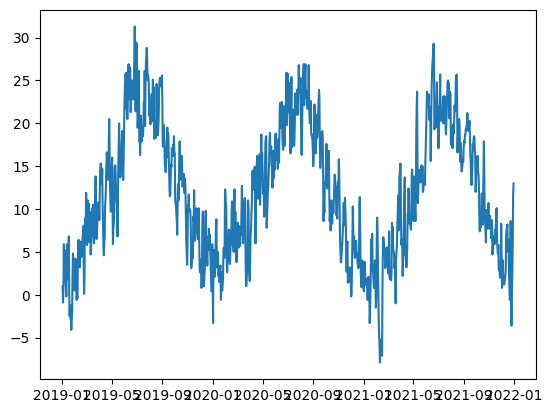

In [86]:
pl = plt.plot(data['date'][-3*365:],data['T-AVG'][-3*365:])

#### Minimal and maximal temperatures for the last three years.

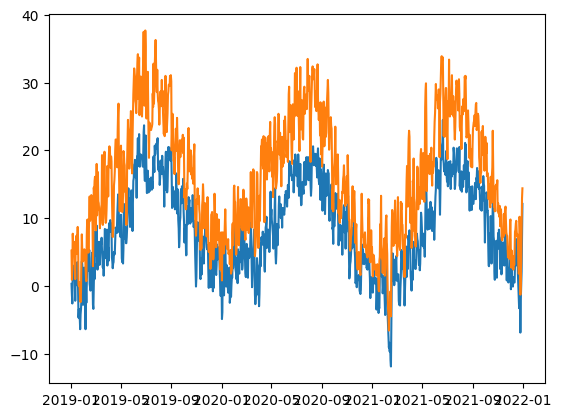

In [87]:
pl = plt.plot(data['date'][-3*365:],data[['TMI','TMA']][-3*365:])


#### Group data by month and year

In [88]:
climate_monthly = data.groupby(['year','month'])

climate_monthly.head(20)

,year,month,day,T-AVG,TMA,TMI,SRA,Flag,date
0,1775,1,1,-7.0,-4.8,-10.1,NaN,NaN,1775-01-01
1,1775,1,2,-2.2,-1.4,-5.8,NaN,NaN,1775-01-02
2,1775,1,3,-1.0,0.6,-2.2,NaN,NaN,1775-01-03
3,1775,1,4,0.1,2.5,-3.6,NaN,NaN,1775-01-04
4,1775,1,5,2.2,3.0,1.6,NaN,NaN,1775-01-05
...,...,...,...,...,...,...,...,...,...
90199,2021,12,16,8.2,9.6,6.9,0.0,T,2021-12-16
90200,2021,12,17,5.7,8.1,4.0,0.0,NaN,2021-12-17
90201,2021,12,18,5.0,7.3,3.0,0.0,NaN,2021-12-18
90202,2021,12,19,6.4,7.6,5.1,0.2,NaN,2021-12-19


#### Since klm monthly is a special object we can calculate the respective values below for each grouped month / year

In [89]:
climate_monthly_aggregated = climate_monthly.aggregate({"T-AVG":np.mean,'TMA':np.max,'TMI':np.min})

#### We actually don't need the month, so we will get the average teperature, the max and min temp for each year

In [90]:
yearly_climate = data.groupby(['year'])
yearly_climate = yearly_climate.aggregate({"T-AVG":np.mean,'TMA':np.max,'TMI':np.min})

<AxesSubplot:xlabel='year'>

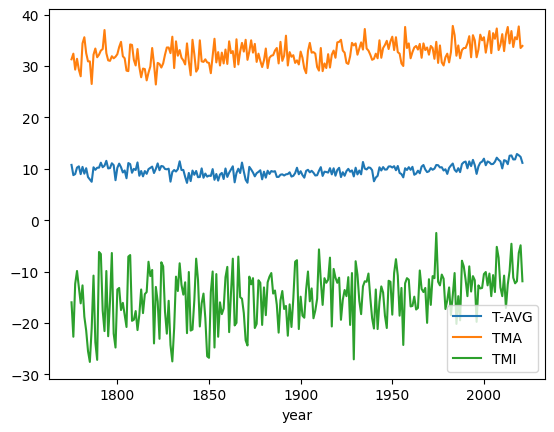

In [91]:
yearly_climate.plot()

#### Now we will implement functions for computing
1. The coldest day between two given dates
2. The hottest day between two given dates
#### The functions should not only return the date, but also the respective temperature.

#### To make our life easier, we can convert the indexes of the table to dates

In [92]:
data = data.set_index('date')

In [93]:
data.head(4)

,year,month,day,T-AVG,TMA,TMI,SRA,Flag
date,,,,,,,,
1775-01-01,1775,1,1,-7.0,-4.8,-10.1,NaN,NaN
1775-01-02,1775,1,2,-2.2,-1.4,-5.8,NaN,NaN
1775-01-03,1775,1,3,-1.0,0.6,-2.2,NaN,NaN
1775-01-04,1775,1,4,0.1,2.5,-3.6,NaN,NaN


In [94]:
## The coldes day between two given dates and the hottest day between two given dates

def max_temperature(start_date, end_date):
    idx = data[start_date:end_date]['TMA'].argmin() # gets the index of the maxmium value
    
    # first param returns the date (index), the second one returns the max_temp
    return data[start_date:end_date].index[idx], data[start_date:end_date].iloc[idx]['TMA']

def min_temperature(start_date, end_date):
    index = data[start_date:end_date]['TMA'].argmax()
    return index, data[start_date:end_date].iloc[index]['TMA']

date_a = '2021-01-01'
date_b = '2021-12-31'
min_temp = min_temperature(date_a, date_b)
max_temp = max_temperature(date_a, date_b)
print(f"Between the dates {date_a} and {date_b}:\n"
      f"    the minimal temperature was {min_temp[1]}°C on {min_temp[0]}\n"
      f"    the maximal temperature was {max_temp[1]}°C on {max_temp[0]}")

Between the dates 2021-01-01 and 2021-12-31:
    the minimal temperature was 33.9°C on 168
    the maximal temperature was -6.6°C on 2021-02-10 00:00:00


#### Implement functions for computing

1. The coldest month between two given month-years
2. The hottest month between two given month-years
3. The coldest year between two given years
4. The hottest year between two given years

In [99]:
# fill in the code of the following function
import datetime

def coldest_month(month_a,year_a,month_b,year_b):
    # return a 3-tuple (m, y, t), where
    # m is the month and y is the year is the year of the coldest month 
    # between month_a of year_a and month_b of year_b,
    # t is the average temperature of the coldest month 
    date_a = datetime.datetime(year=year_a, month=month_a, day=1)
    date_b = datetime.datetime(year=year_b, month=month_b, day=1)
    monthly_klm = data[date_a:date_b].groupby(["year", "month"])
    monthly_klm_agg = monthly_klm.aggregate({"TMA": np.mean})
    y, m = monthly_klm_agg["TMA"].idxmin()
    temp = monthly_klm_agg["TMA"].min()
    return m, y, temp

month_a = 1
year_a = 1900
month_b = 12
year_b = 1999

coldest_m = coldest_month(month_a, year_a, month_b, year_b)
print(f"The coldest month between {year_a}/{month_a} and {year_b}/{month_b}\n"
      f"was month {coldest_m[0]} of year {coldest_m[1]} with the average temperature {coldest_m[2]}")

The coldest month between 1900/1 and 1999/12
was month 2 of year 1929 with the average temperature -7.046428571428572
